<a href="https://colab.research.google.com/github/Vedric/Prediction-CO2-Emission---Analyse-pr-dictive-de-donn-es-structur-es-par-l-intelligence-artificielle/blob/main/Pr%C3%A9diction_CO2_Emission_Analyse_pr%C3%A9dictive_de_donn%C3%A9es_structur%C3%A9es_par_l'intelligence_artificielle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1><center> Prédiction CO2 Emission : Analyse prédictive de données structurées par l'intelligence artificielle (Régression Linéaire) </center></h1> 

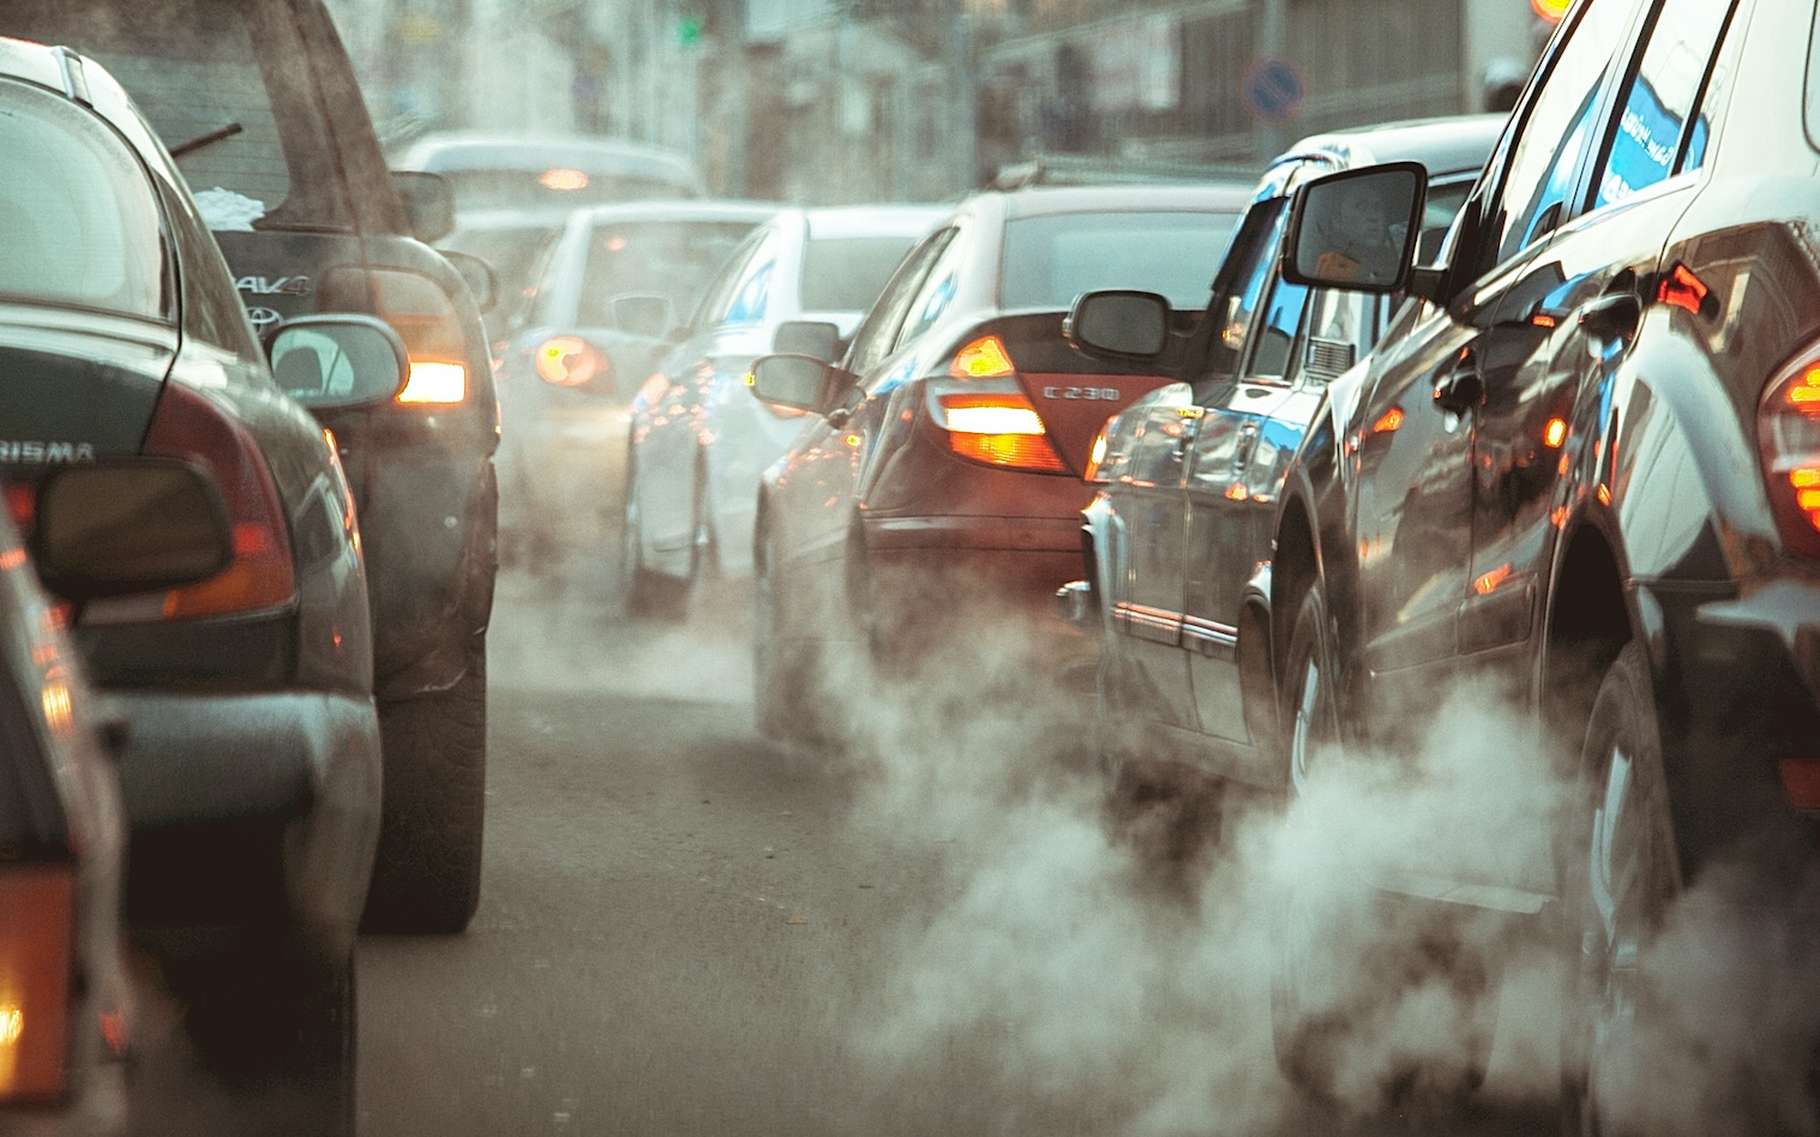

## INTRODUCTION

Le secteur des transports, notamment le transport automobile, est l'une des activités économiques les plus émettrices de gaz à effet de serre comme le dioxyde de carbone, principal responsable du réchauffement climatique. Dans cette étude, nous proposons d'établir un modèle de prédiction des émissions de dioxyde de carbone des voitures basé sur certaines caractéristiques de la voiture.

L'ensemble de données est tiré du site Web officiel du gouvernement canadien, et le lien est le suivant : https://open.canada.ca/data/fr/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6 Cet ensemble de données contient des données officielles sur les émissions de dioxyde de carbone de diverses voitures présentant des caractéristiques différentes au cours de la période 2014-2020. 
Il a un total de 7385 échantillons et 11 fonctionnalités. 

Certaines abréviations sont utilisées dans ces données pour indiquer différentes caractéristiques. Ces abréviations sont les suivantes :

# 1. Importation des librairies nécéssaires

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")
from google.colab import files
uploaded = files.upload()

Saving CO2_Emissions_.csv to CO2_Emissions_.csv
Saving Data_Description.csv to Data_Description.csv
Saving f6b9eb4bb1_50160005_particules-ultrafines-voitures.jpeg to f6b9eb4bb1_50160005_particules-ultrafines-voitures.jpeg


In [4]:
Data_description = pd.read_csv('Data_Description.csv')
Data_description.head(19)

,Understanding the Data,Unnamed: 1
0,Model,4WD/4X4 = Four-wheel drive
1,NaN,AWD = All-wheel drive
2,NaN,FFV = Flexible-fuel vehicle
3,NaN,SWB = Short wheelbase
4,NaN,LWB = Long wheelbase
5,NaN,EWB = Extended wheelbase
6,Transmission,A = automatic
7,NaN,AM = automated manual
8,NaN,AS = automatic with select shift
9,NaN,AV = continuously variable


## 2. Importation et lecture du Dataset

In [5]:
# Affichage des 10 première lignes

df = pd.read_csv('CO2_Emissions_.csv')

df.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [6]:
# Affichage de la forme de notre Dataset

df.shape

(7385, 12)

In [7]:
# Affichage de toutes les colonnes

df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [8]:
# Affichage du nombre de modèles

df["Make"].nunique()

42

In [9]:
df["Make"].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

Il y donc 42 marques de voitures.

In [10]:
# Affichage du nombre de modèles 

df.Model.nunique()

2053

Il y a 2053 modèles de voitures.

In [ ]:
# Affichage du type de véhicule , compact , SUV ...

df["Vehicle Class"].nunique()

16

In [ ]:
df["Vehicle Class"].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [ ]:
# Affichage des transmissions , A = Automatique et M = Manuel

df["Transmission"].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

## Conclusion du Dataset

Il y a 42 marques de voitures au total. Il existe 2053 modèles de voitures uniques. Les données ne peuvent pas être converties en variables fictives et ne peuvent pas être utilisées pour l'analyse. 

Nous pouvons donc supprimer cette colonne. Selon le poids nominal brut du véhicule (PNBV) et l'indice de volume, il existe 16 catégories de véhicules. Mais il n'y a pas de données disponibles pour la valeur exacte du PNBV ou de l'indice de volume, nous pouvons donc regrouper des véhicules similaires dans un groupe. 

Les 27 transmissions sont réparties en 5 transmissions différentes, sans tenir compte du nombre d'embrayages car elles n'ont aucun effet sur les émissions de dioxyde de carbone.

# 3. Analyse descriptive , détection des valeurs manquantes , traitement des valeurs abérantes

In [ ]:
# Affichage du nombre de valeurs de chaque variable

df['Vehicle Class'].value_counts()

SUV - SMALL                 1217
MID-SIZE                    1133
COMPACT                     1022
SUV - STANDARD               735
FULL-SIZE                    639
SUBCOMPACT                   606
PICKUP TRUCK - STANDARD      538
TWO-SEATER                   460
MINICOMPACT                  326
STATION WAGON - SMALL        252
PICKUP TRUCK - SMALL         159
MINIVAN                       80
SPECIAL PURPOSE VEHICLE       77
VAN - PASSENGER               66
STATION WAGON - MID-SIZE      53
VAN - CARGO                   22
Name: Vehicle Class, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [ ]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

Le dataset ne présente aucune valeur manquante. 

In [ ]:
# Gamme interquartile pour le traitement des valeurs abérantes

Quantile_1 = df['CO2 Emissions(g/km)'].quantile(0.25)
Quantile_3 = df['CO2 Emissions(g/km)'].quantile(0.75)
Inter_quartile_range = Quantile_3 - Quantile_1
Quantile_3 + 1.5 * Inter_quartile_range

408.0

In [ ]:
# Traitement des valeurs abérantes
Quantile_3 = df.quantile(0.75)
Inter_quartile_range = Quantile_3 - Quantile_1
df = df.loc[df['CO2 Emissions(g/km)'] <= 408]

In [ ]:
df.shape

(7305, 12)

## 4. DETERMINATION DES POTENTIELLES VARIABLES PREDICTRICES

# Carte des corrélations

La matrice de corrélation est très simple, il s'agit d'une matrice de coefficients de corrélation statistique ou de coefficients de corrélation aléatoire calculés pour plusieurs paires de variables. Ce sont généralement des coefficients de Pearson.

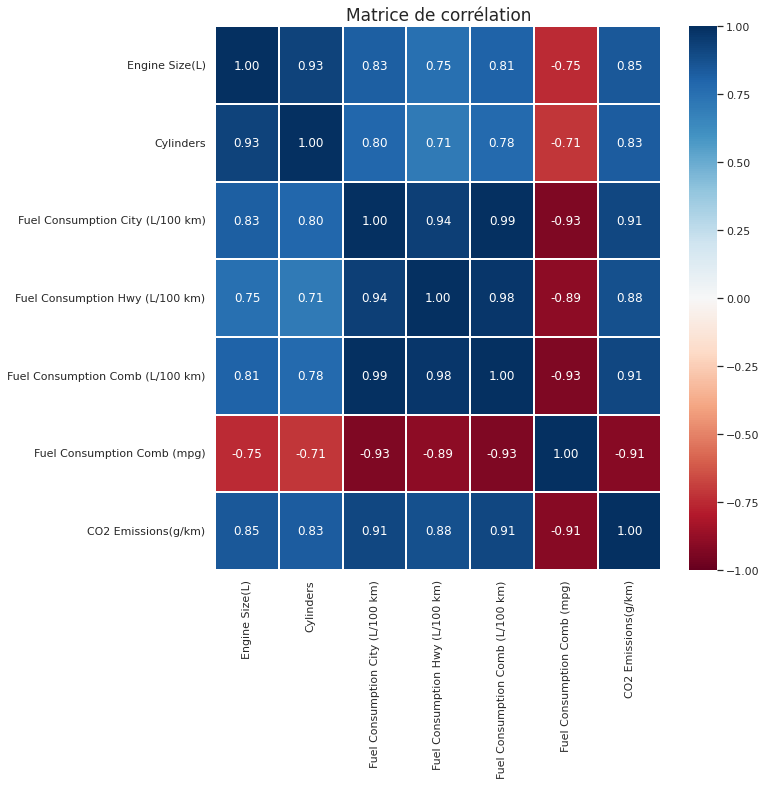

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})

sns.heatmap(df.corr(), center=0, cmap='RdBu', linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)

plt.title('Matrice de corrélation', fontsize = 17)

plt.show()

# Boites à moustache : Cylinders VS CO2 Emissions 

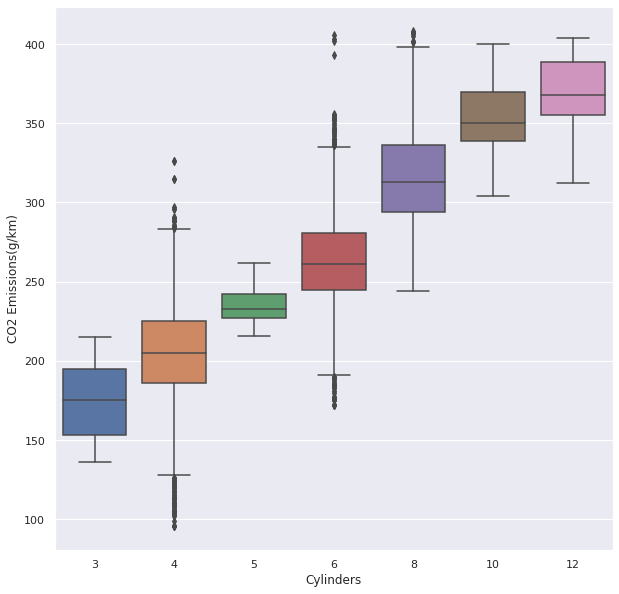

In [ ]:
sns.boxplot(x = 'Cylinders', y = 'CO2 Emissions(g/km)', data = df)

plt.show()

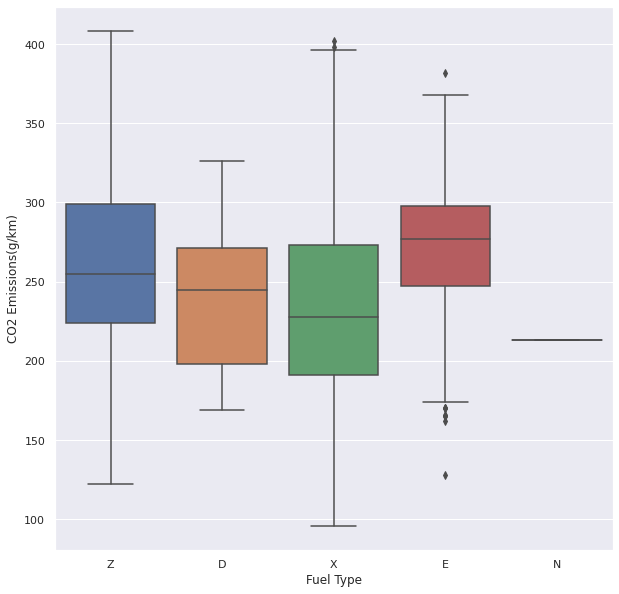

In [ ]:
# Boxplot FUELTYPE VS CO2 Emissions

sns.boxplot(x = 'Fuel Type', y = 'CO2 Emissions(g/km)', data = df)

plt.show()

## 5. MODELISATION

In [ ]:
# Variables indépendantes 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Comb (L/100 km)

X = df[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Comb (L/100 km)']]

# Variable dépendante 'CO2 Emissions(g/km)'

y = df['CO2 Emissions(g/km)']

In [ ]:
# Train (75%)/Test(25%)

seed = 111

test_size = 0.25

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

# 1. Entrainement et évalution du premier modèle de régression linéaire

In [ ]:
# Entrainement 

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Ordonnée à l'origine 

lr.intercept_

52.043486857333846

In [ ]:
# Coefficient 

lr.coef_

array([8.95734975, 7.82472639])

In [ ]:
# Coefficient de détermination

lr.score(X_train,y_train)

0.8422467488150536

# Evaluation de l'algorithme

In [ ]:
# Emission du CO2 prédits à partir du modèle

Y_hat = lr.predict(X_test)

In [ ]:
Y_hat

array([237.55242309, 186.97967   , 254.5610239 , ..., 180.04031487,
       242.58704593, 228.26565005])

In [ ]:
# Erreur quadratique moyenne (Mean Squared Error ou MSE)

mse = mean_squared_error(y_test, Y_hat)

mse

540.5153835682609

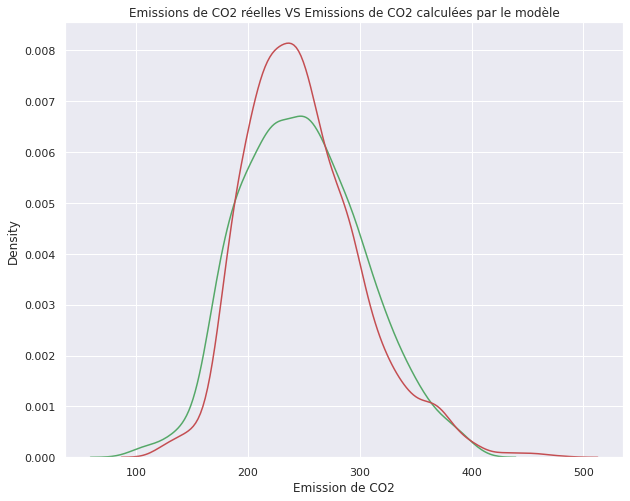

In [ ]:
# Distributions des valeurs ajustées et des valeurs réelles

plt.figure(figsize=(10, 8))

ax1 = sns.distplot(y_test, hist=False, color="g", label="Emissions de CO2 réels")

sns.distplot(Y_hat, hist=False, color="r", label="Emissions de CO2 calculées" , ax=ax1)

plt.title('Emissions de CO2 réelles VS Emissions de CO2 calculées par le modèle')

plt.xlabel('Emission de CO2')

plt.show()

plt.close()

# Utilisation de RandomForestRegressor() et de DecisionTreeRegressor()

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

In [ ]:
def auto_ml(algorithme, train_X, train_y, test_X, test_y):
    model = algorithme
    model.fit(train_X, train_y)
    print("Le coefficient de détermination sur les données d'entraînement est de",
          model.score(train_X, train_y))
    train_pred = model.predict(train_X)
    print("L'erreur quadratique moyenne sur les données d'entraînement est de",
          mean_squared_error(train_y, train_pred))
    print("Le coefficient de détermination sur les données de test est de",
          model.score(test_X, test_y))
    test_pred = model.predict(X_test)
    print("L'erreur quadratique moyenne sur les données de test est de",
          mean_squared_error(test_y,test_pred))

In [ ]:
algo_table = [RandomForestRegressor(random_state = seed),
                    DecisionTreeRegressor(random_state = seed)]

for i in algo_table:
    print(i)
    auto_ml(i, X_train, y_train, X_test, y_test)
    print("-" * 111)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=111, verbose=0, warm_start=False)
Le coefficient de détermination sur les données d'entraînement est de 0.9730389918480125
L'erreur quadratique moyenne sur les données d'entraînement est de 83.17079851901089
Le coefficient de détermination sur les données de test est de 0.9471647567300152
L'erreur quadratique moyenne sur les données de test est de 158.03969665344832
---------------------------------------------------------------------------------------------------------------
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max